In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

%matplotlib inline

In [2]:
data = pd.read_csv("csvs/day_file.csv", parse_dates=["time"])

# Average PoW difficulty

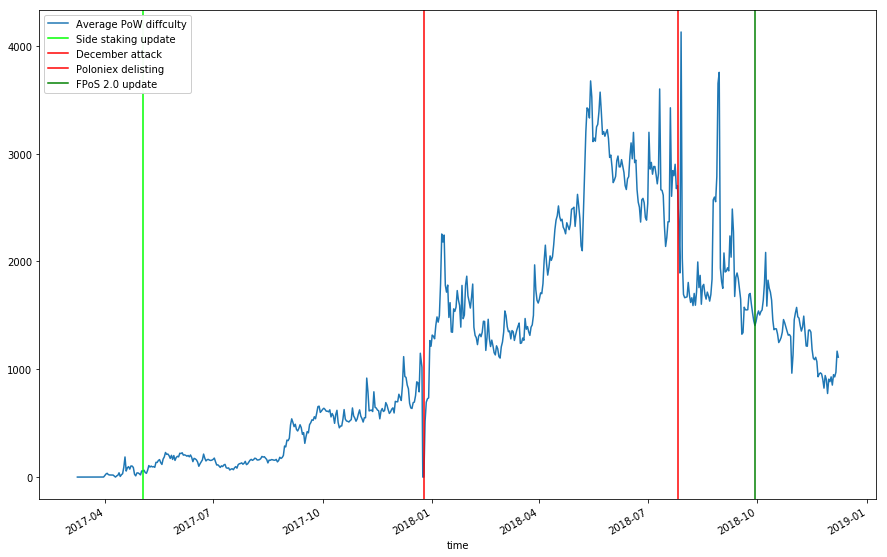

In [3]:
data.plot(
    x="time", y="avg_pow_difficulty",
    figsize=(15, 10),
    label="Average PoW diffculty"
)
plt.axvline(x=datetime(2017, 5, 3), ymin=0, ymax=2, color="lime", label="Side staking update")
plt.axvline(x=datetime(2017, 12, 25), ymin=0, ymax=2, color="red", label="December attack")
plt.axvline(x=datetime(2018, 7,26), ymin=0, ymax=2, color="red", label="Poloniex delisting")
plt.axvline(x=datetime(2018, 9, 29), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")

plt.legend(loc="upper left", framealpha=0.95);

# Average PoS difficulty

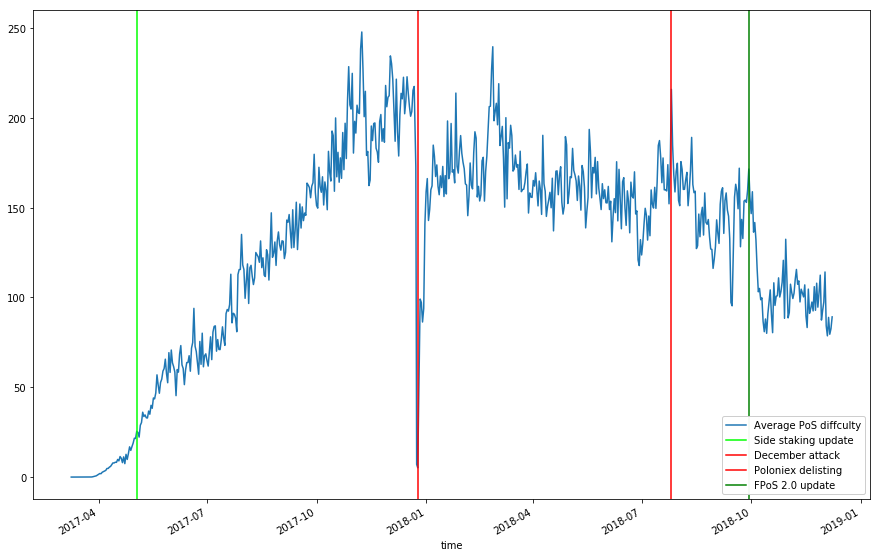

In [4]:
data.plot(
    x="time", y="avg_pos_difficulty",
    figsize=(15, 10),
    label="Average PoS diffculty"
)
plt.axvline(x=datetime(2017, 5, 3), ymin=0, ymax=2, color="lime", label="Side staking update")
plt.axvline(x=datetime(2017, 12, 25), ymin=0, ymax=2, color="red", label="December attack")
plt.axvline(x=datetime(2018, 7,26), ymin=0, ymax=2, color="red", label="Poloniex delisting")
plt.axvline(x=datetime(2018, 9, 29), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")

plt.legend(loc="lower right", framealpha=0.95);

# Average FPoS difficulty

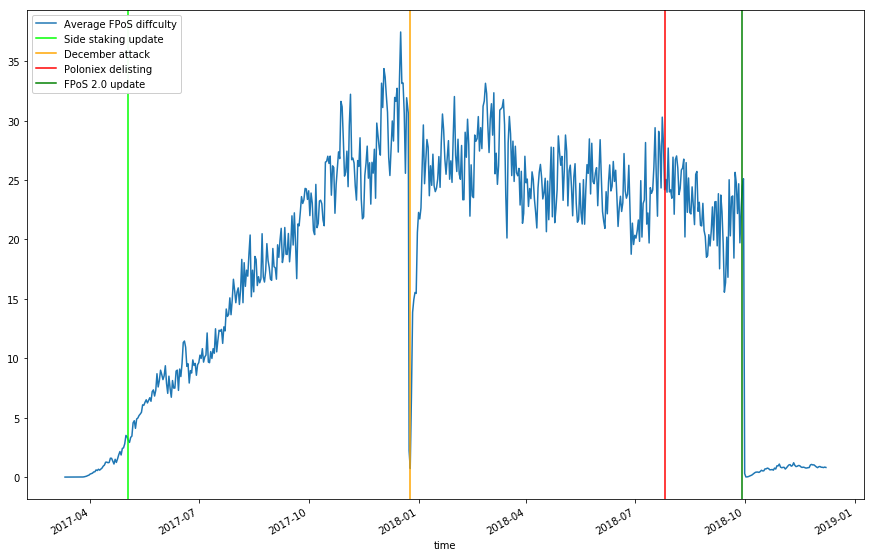

In [5]:
data[2:].plot(
    x="time", y="avg_fpos_difficulty",
    figsize=(15, 10),
    label="Average FPoS diffculty"
)
plt.axvline(x=datetime(2017, 5, 3), ymin=0, ymax=2, color="lime", label="Side staking update")
plt.axvline(x=datetime(2017, 12, 25), ymin=0, ymax=2, color="orange", label="December attack")
plt.axvline(x=datetime(2018, 7,26), ymin=0, ymax=2, color="red", label="Poloniex delisting")
plt.axvline(x=datetime(2018, 9, 29), ymin=0, ymax=2, color="green", label="FPoS 2.0 update")

plt.legend(loc="upper left", framealpha=0.95);